In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pandas as _pd
import glob as _gl
import pymad8 as _m8
import pybdsim as _bd
import beamTracking
import beamWire
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.29/01


In [2]:
date = "2023_06_09"
save_name_prefix = "plots/BeamWire/" + date + "_T20_plot"

In [3]:
#beamWire.analyticConvolution()

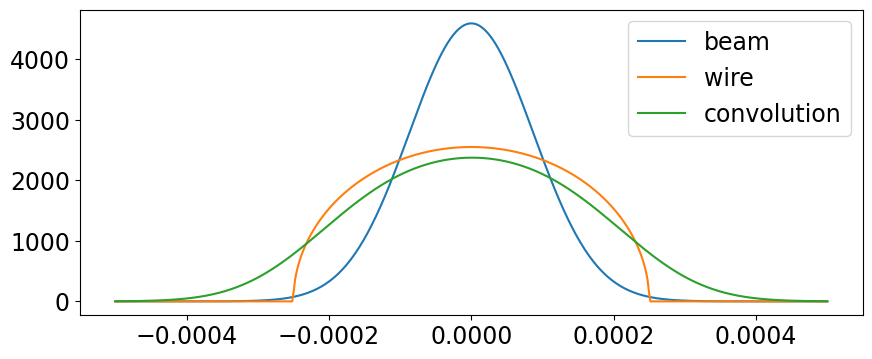

In [4]:
beamWire.PlotConvolutionExample()
#_plt.savefig("{}_convolution_example".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

In [6]:
#valuelist=['-0.50','-0.45','-0.40','-0.35','-0.30','-0.25','-0.20','-0.15','-0.10','-0.05',
#           '+0.00',
#           '+0.05','+0.10','+0.15','+0.20','+0.25','+0.30','+0.35','+0.40','+0.45','+0.50']
#beamWire.GenerateAllGmadFilesAndList(tag="T20_for_wire", valuetoscan='wireOffsetX', valuelist=valuelist)

In [7]:
#beamWire.runOneOffset("../03_bdsimModel/T20_for_wire_with_offset_+0.00_bias_5e0.gmad", npart=100, seed=0, silent=True)
#beamWire.analysis("../04_dataLocal/100_part_T20_for_wire_with_offset_+0.00_bias_5e0.root")

In [14]:
#beamWire.runScanOffset(tagfilelist="tagfilelistwire", npart=10000, seed=None, silent=True)

Loading of 21 files done. Run 10000 particles: |██████████████████████████████████████████████████| 100.0% Complete██████████████████████████████---| 95.2% Complete


In [15]:
#beamWire.analysis(_gl.glob("../04_dataLocal/10000_part_T20_for_wire_with*.root"))

BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_-0.20_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_+0.00_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_-0.50_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_-0.40_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_-0.30_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_+0.10_bias_5e0.root  / Nb of entries =  10000
BDSIM output file - using DataLoader
File : ../04_dataLocal/10000_part_T20_for_wire_with_offset_+0.30_bias_5e0.root  / Nb of entries =  10000
BDSIM 

0

In [16]:
#OFFSETS, NPHOTONS, ERRORS = beamWire.countPhotonsInHistAllFiles('../06_analysis/*_T20_for_wire*_merged_hist.root', 'PHOTONS_R')
OFFSETS, NPHOTONS, ERRORS = beamWire.countPhotonsInHistAllFiles('../06_analysis/10000_part_T20_for_wire_with*_hist.root', 'PHOTONS_R')

REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile
REBDSIM analysis file - using RebdsimFile


[102240.37170410156, 690676.1756166816, 16220612.911840728, 82352735.19676802, 302168675.1243213, 749599197.9270475, 1298094898.856622, 1826241231.60463, 2226122886.9395533, 2485099621.064987, 2426965915.186612, 2428230240.1726613, 2195463453.68456, 1865338407.867197, 1330083355.7692635, 796428027.0315764, 319028782.8271562, 88701732.00689737, 17106276.986906234, 1699605.163896922, 118364.66193199158]


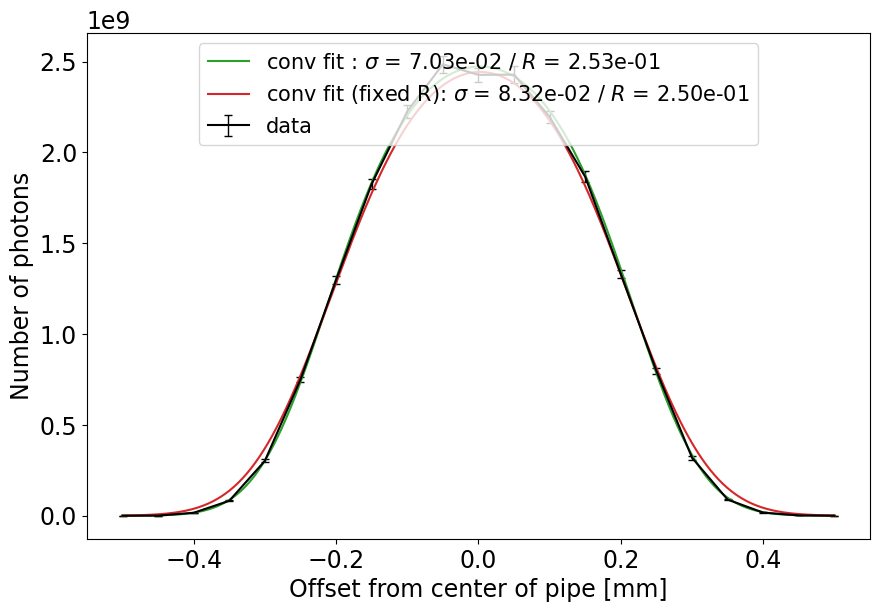

In [17]:
print(NPHOTONS)
beamWire.PlotConvolution(OFFSETS, NPHOTONS, ERRORS)
_plt.savefig("{}_photon_beam_scan_and_convolution_fit".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

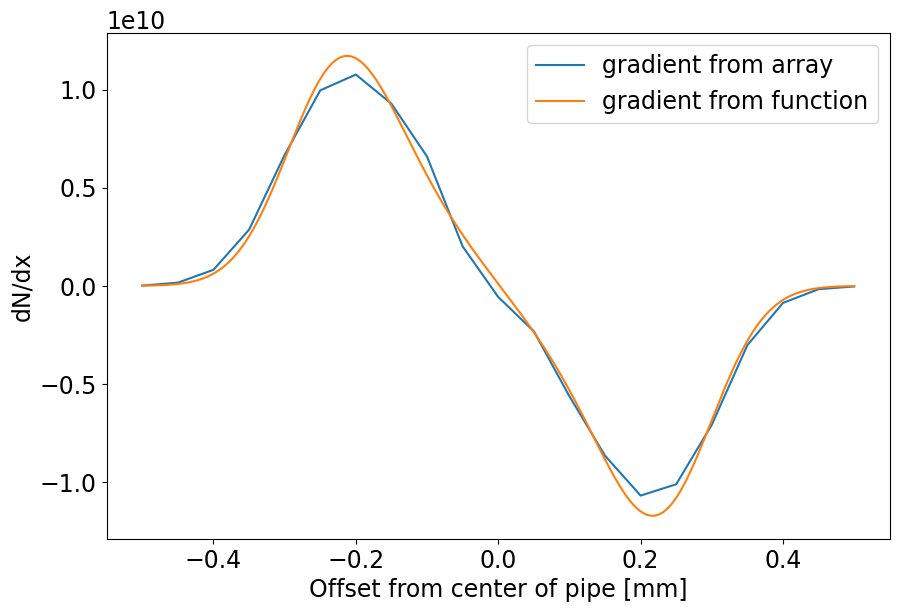

In [18]:
_plt.rcParams['font.size'] = 17
fig, ax = _plt.subplots(1,1,figsize=(9,6))
fig.tight_layout()
_plt.plot(OFFSETS, _np.gradient(NPHOTONS, OFFSETS), label='gradient from array')
popt, pcov = curve_fit(beamWire.func_conv, OFFSETS, NPHOTONS, p0=[3e9, 50e-3, 0, 250e-3])
X = _np.linspace(-0.5, 0.5, 500)
_plt.plot(X, _np.gradient(beamWire.func_conv(X, A=popt[0], sigma=popt[1], mu=popt[2], R=popt[3]), X), label='gradient from function')

_plt.xlabel('Offset from center of pipe [mm]')
_plt.ylabel('dN/dx')
_plt.legend()

_plt.savefig("{}_derivative_of_photon_beam_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")

REBDSIM analysis file - using RebdsimFile


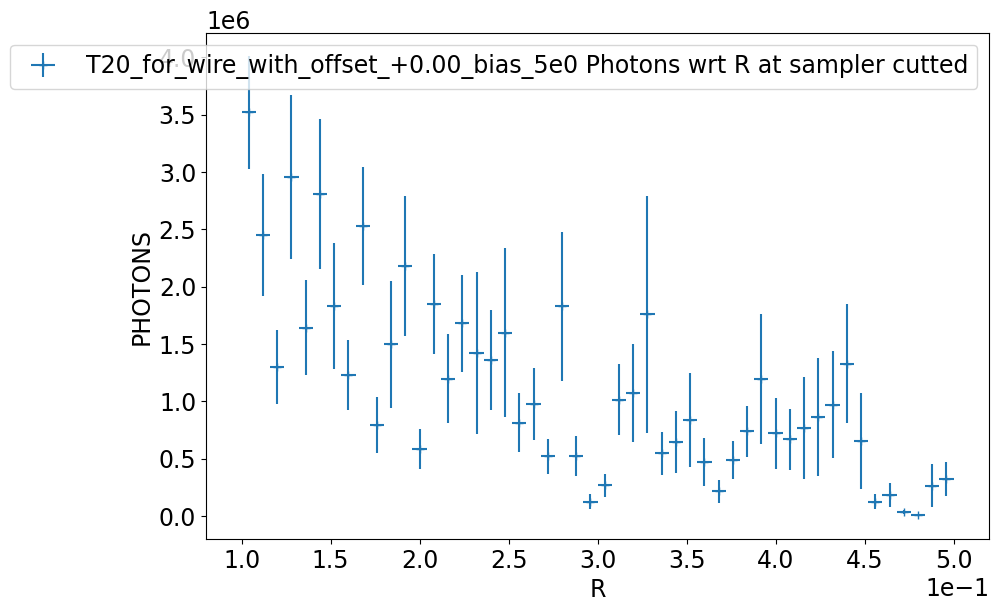

In [19]:
beamWire.plot_hist("../06_analysis/10000_part_T20_for_wire_with_offset_+0.00_bias_5e0_hist.root", "PHOTONS_R_cut", steps=False, errorbars=True)
_plt.ticklabel_format(axis='both', style='sci', scilimits=(1,6))
_plt.savefig("{}_photon_beam_X_profile".format(save_name_prefix), dpi="figure", bbox_inches='tight', facecolor="#FF000000")